In [14]:
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [15]:
df=pd.DataFrame( {'t': [ 0.,  1.11,  2.22,  3.33,  4.44, 5.55],
                 #'x': [2.76,  29.66,46.83,44.08,37.26,12.03],
                  'v': [33.10, 21.33, 16.57, -5.04, -11.74, -27.32]} )
                  
df[['t','v']]

,t,v
0,0.00,33.10
1,1.11,21.33
2,2.22,16.57
3,3.33,-5.04
4,4.44,-11.74
5,5.55,-27.32


In [16]:
def f(t,a1,a0):
    return a1*t+a0

a, Da = opt.curve_fit(f, df.t, df.v)

In [17]:
f_fit = df['t']*a[0] + a[1]
slope_max = df['t']*(a[0]+Da[0, 0]) + a[1]
slope_min = df['t']*(a[0]-Da[0, 0]) + a[1]
intercept_max = df['t']*a[0] + (a[1]+Da[1, 1])
intercept_min = df['t']*a[0] + (a[1]-Da[1, 1])

Text(0.5, 1.0, 'Ajustes lineales')

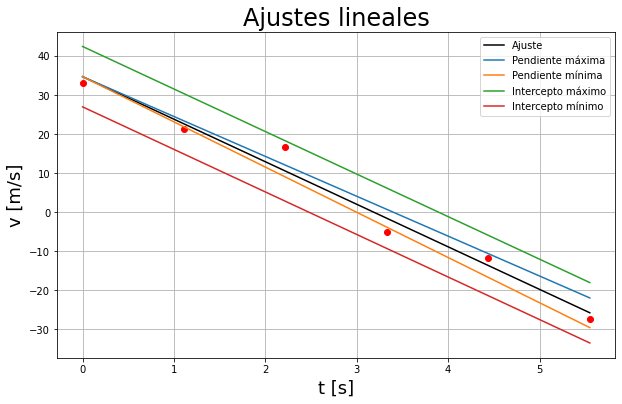

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['t'], df['v'], 'ro')
ax.plot(df['t'], f_fit, 'k-', label='Ajuste')
ax.plot(df['t'], slope_max, label='Pendiente máxima')
ax.plot(df['t'], slope_min, label='Pendiente mínima')
ax.plot(df['t'], intercept_max, label='Intercepto máximo')
ax.plot(df['t'], intercept_min, label='Intercepto mínimo')
ax.legend()
ax.grid()
ax.set_xlabel('t [s]', size=18)
ax.set_ylabel('v [m/s]', size=18)
ax.set_title('Ajustes lineales', size=24)